# 01NAEX - HW2: Reaction Time Experiment

**Team Name:** Petr Večeř, Filip Adámek,

In [ ]:
from google.colab import drive
import pandas as pd

# Assignment — Reaction Time Experiment

## Objective
Design and execute a controlled experiment to measure human reaction time to visual stimuli using the **Reaction Time Lab App** or your own.
You must investigate **at least 7 experimental factors**, chosen from the available app configuration options or added by your interest.  
Use either:

- a **fractional factorial design**: \(2^{7-1}\), \(2^{7-2}\), …  
- a **full factorial design with blocking**,  
- or a **fractional design with blocking**.

You must treat **4 students as blocks**.

The response variable is the **reaction time in milliseconds**.

---



# Submission Conditions
- Submit a **Jupyter notebook** containing:
  - Explanations
  - Designs
  - Data
  - Code
  - Visualizations
  - Statistical analysis
  - Final interpretation
- Deadline: **December 7, 2025**.

Ensure randomisation, consistency, and clear documentation throughout the experiment.


# 1. Define the low and high levels for each selected factor
- Specify which values correspond to low and high levels.
- For numerical variables (you can convert some categorical to numerical if you prefere numerical oness), define the actual ranges and how they will be coded.
- Describe what data you will record.

---

| Factor | Low Level (-1) | High Level (1)|
|-------|-----------|------------|
| Stimulus type | Letters | Digits |
| Font size | Small | Large |
| Text motion | Static | Moving |
| Frame motion | Static frame | Shaking frame |
| Text color mode | Black | Random colors |
| Background color mode | White | Random colors |
| Delay before cue (numerical) | Low value (1 s) | High value (4 s) |





The only numerical variables among factors is a factor Delay before cue. This variable represents the waiting time before the stimulus appears. Time is a continuous numerical variable. However, for this factorial design, we have converted it into a fixed categorical variable - Low value (1 s), High value (4 s).
\
We did this to maximize Signal: By choosing values at the extremes of a reasonable wait time (1s vs 4s), we maximize the chance of detecting a significant effect. By measuring only the endpoints (1s and 4s), we assume the effect of delay on reaction time is roughly linear (or monotonic) between these points.
\
While the physiological relationship between wait time and reaction time is likely non-linear (often U-shaped), a 2-level design only tests the contrast between two specific points. We assume that the difference between these two chosen points is representative of the general effect of "Waiting Longer" againts "Optimal delay" in this context.

For each of the 32 experimental configurations, we will record the Median Reaction Time (ms).

# 2. Design the factorial or fractional factorial experiment
- Choose the design type:
  - Full \(2^k\)
  - Fractional \(2^{k-1}\)
  - Fractional \(2^{k-2}\)
  - Blocked full or blocked fractional
- Specify:
  - Generators
  - Resolution
  - Alias structure
  - How blocking by students is implemented

Explain how the design affects interpretability of main effects and interactions.

---

We are employing a Replicated $2^{7-2}$ Fractional Factorial Design.

*  We select $2^{7−2}=32$ out of $128$ possible combinations
*  We replicate the entire $32$-run base design $4$ times (once for each student)

 we have opted for IV resolution, meaning main effects are not aliased with any other main effect or any 2-factor interaction. 2-factor interactions are aliased with other 2-factor interactions.
\
The generators for our design are
* $F=ABCD$
* $G=ABCE$


The rotations are $I = DEFG = ABCDF = ABCEG$


This Resolution IV design was specifically chosen to maximize the interpretability of the "Core" factors (A, B, C) and their interactions with Delay (G). We assume these are the most influential variables on the reaction time.

* Main Effects (A–G): Clear. No main effect is confounded with any other main effect or 2-factor interaction.
* Core Interactions: All interactions between Stimulus (A), Font (B), and Motion (C) are clear.
* Delay Interactions: Interactions between the Core factors and Delay (AG, BG, CG) are clear.
* The following interactions are allised $D×E=F×G$, $D×F=E×G$, $D×G=E×F$

We implement blocking using Replicates, treating each student as a block, meaning each of the 4 experimenters measures the full set of 32 combinations defined by the fractional design. This approach allows us to separate the variation caused by individual differences from the experimental error.

# 3. Measure data
- Use the Reaction Time Lab App.
- Repeat each experimental combination **7–15 times**.
- Use the **median** reaction time for analysis.
- Randomize measurement order within each block.

---

In [ ]:
import pandas as pd

data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTuIJtC6H9DFB4fRZs17kGYSEG808HB30uMoXrn7L2Q7UN6Q0cNWhDFaj2ZbHc_iFBUQblIT0919LiD/pub?gid=1661984755&single=true&output=csv' #'/content/drive/MyDrive/naex/reaction_time_schedule.csv.xlsx'

# Read the CSV file (adjust path to your file location)
preview = pd.read_csv(data_path)[:128]

print(preview.head())

   Student  Run_Order       A_label     B_label      C_label  \
0        1          1    Digits (1)   Large (1)  Static (-1)   
1        1          2  Letters (-1)   Large (1)   Moving (1)   
2        1          3  Letters (-1)  Small (-1)   Moving (1)   
3        1          4  Letters (-1)   Large (1)   Moving (1)   
4        1          5  Letters (-1)  Small (-1)   Moving (1)   

             D_label            E_label            F_label          G_label  \
0  Static frame (-1)         Black (-1)  Random colors (1)    Long (4s) (1)   
1  Static frame (-1)  Random colors (1)  Random colors (1)  Short (1s) (-1)   
2  Shaking frame (1)  Random colors (1)  Random colors (1)    Long (4s) (1)   
3  Static frame (-1)         Black (-1)  Random colors (1)    Long (4s) (1)   
4  Shaking frame (1)         Black (-1)  Random colors (1)  Short (1s) (-1)   

  RESULTS [ms]  
0      2278,13  
1      1451,15  
2      1135,74  
3      1964,08  
4      1516,55  


# 4. Calculate factor effects and interactions
- Code factors using \(-1, +1\).
- Compute main effects and interactions.
- Interpret magnitude and sign.

---

Found results column: 'RESULTS [ms]'
Data Loaded and Cleaned: 128 rows.
Average Reaction Time: 1723.53 ms

--- MAIN EFFECTS (ms) ---
Factor               | Effect     | Interpretation
------------------------------------------------------------
Stimulus             |  -145.68   | High setting is Faster
Font Size            |     3.06   | High setting is Slower
Motion               |    52.14   | High setting is Slower
Frame                |   -85.88   | High setting is Faster
Color                |    12.30   | High setting is Slower
Background           |   104.28   | High setting is Slower
Delay                |    19.01   | High setting is Slower

--- CRITICAL INTERACTIONS (Core x Delay) ---
Stimulus x Delay     |   -10.19
Font Size x Delay    |    36.44
Motion x Delay       |   -67.21
Background x Delay   |    -6.59
Frame x Background   |   -37.19
Frame x Delay        |   -54.13


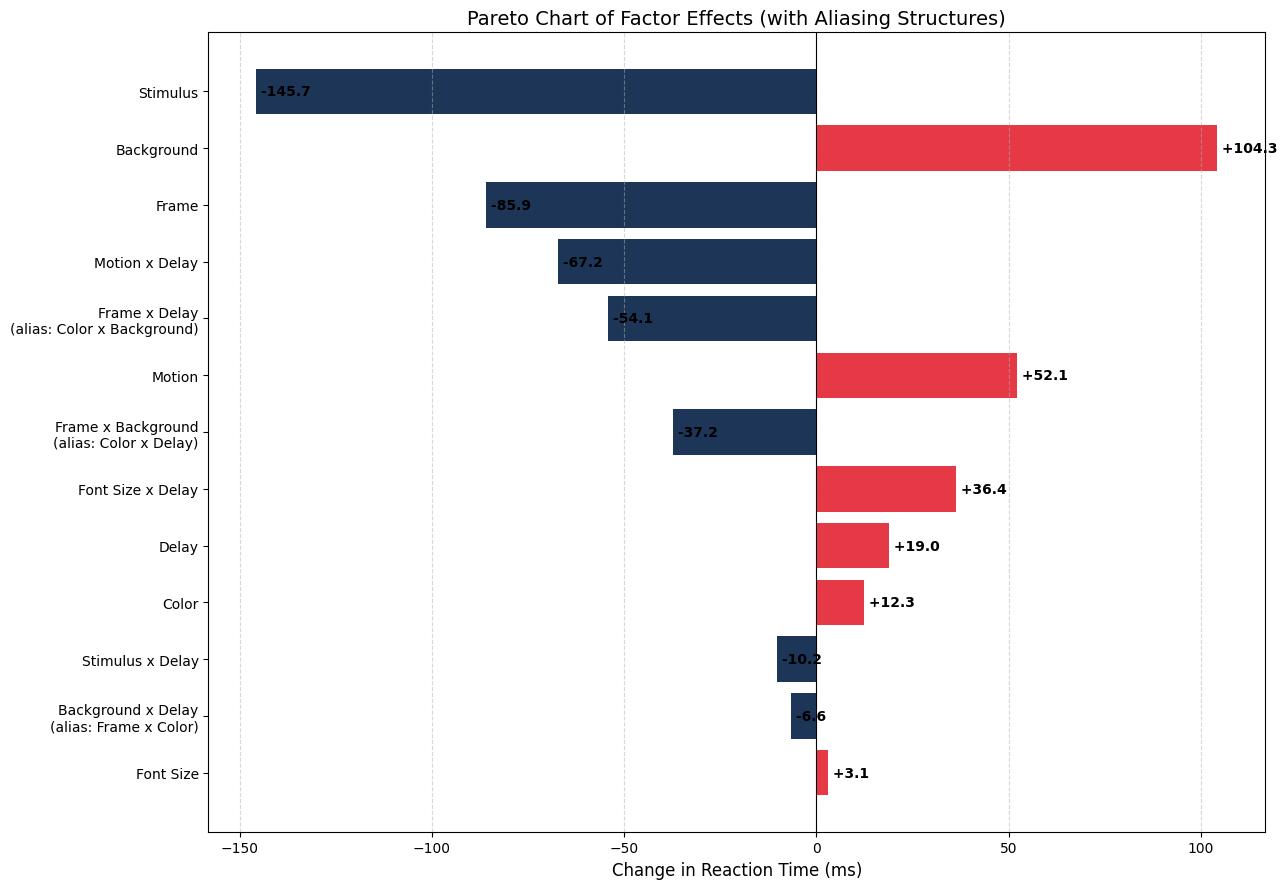

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Identify the results column (it might be named 'RESULTS [ms]')
# We search for any column containing 'RESULTS' or 'Reaction'
res_col = [c for c in preview.columns if 'RESULTS [ms]' in c or 'Reaction' in c][0]
print(f"Found results column: '{res_col}'")

# CRITICAL FIX for European Decimals ("2278,13")
# 1. Force convert to string
    # 2. Replace comma ',' with dot '.'
    # 3. Convert to float
preview['RESULTS [ms]'] = preview[res_col].astype(str).str.replace(',', '.', regex=False)
preview['RESULTS [ms]'] = preview['RESULTS [ms]'].str.strip().dropna()
preview['RESULTS [ms]'] = pd.to_numeric(preview['RESULTS [ms]'], errors='coerce')

print(f"Data Loaded and Cleaned: {len(preview)} rows.")
print(f"Average Reaction Time: {preview['RESULTS [ms]'].mean():.2f} ms")

# ==========================================
# 2. CODE FACTORS (-1, +1)
# ==========================================
# We extract the number inside the parentheses of your labels
factors = {
    'A': 'Stimulus', 'B': 'Font Size', 'C': 'Motion',
    'D': 'Frame', 'E': 'Color', 'F': 'Background', 'G': 'Delay'
}

for code in factors.keys():
    col_name = f"{code}_label"
    # Extract the -1 or 1 using regex
    preview[code] = preview[col_name].astype(str).str.extract(r'\((-1|1)\)').astype(int)

# ==========================================
# 3. COMPUTE EFFECTS
# ==========================================
effects = {}

# --- A. Main Effects ---
print("\n--- MAIN EFFECTS (ms) ---")
print(f"{'Factor':<20} | {'Effect':<10} | {'Interpretation'}")
print("-" * 60)

for code, name in factors.items():
    # Mean when Factor is +1 minus Mean when Factor is -1
    avg_high = preview[preview[code] == 1]['RESULTS [ms]'].mean()
    avg_low = preview[preview[code] == -1]['RESULTS [ms]'].mean()
    effect = avg_high - avg_low
    effects[name] = effect

    interp = "Slower" if effect > 0 else "Faster"
    print(f"{name:<20} | {effect:>8.2f}   | High setting is {interp}")

# --- B. Interactions (Core x Delay) ---
# We focus on the interactions we hypothesized were important
print("\n--- CRITICAL INTERACTIONS (Core x Delay) ---")
interaction_pairs = [('A','G'), ('B','G'), ('C','G'),('F','G'), ('D','F'), ('D','G')]

for f1, f2 in interaction_pairs:
    # Create Interaction Vector (Element-wise multiplication)
    inter_vector = preview[f1] * preview[f2]

    avg_match = preview[inter_vector == 1]['RESULTS [ms]'].mean()
    avg_mismatch = preview[inter_vector == -1]['RESULTS [ms]'].mean()
    effect = avg_match - avg_mismatch

    label = f"{factors[f1]} x {factors[f2]}"
    effects[label] = effect
    print(f"{label:<20} | {effect:>8.2f}")

# ==========================================
# 4. PREPARE PLOTTING DATA WITH ALIASES
# ==========================================
# 1. Create DataFrame
effects_df = pd.DataFrame(list(effects.items()), columns=['Factor', 'Effect'])
effects_df['Magnitude'] = effects_df['Effect'].abs()
effects_df = effects_df.sort_values('Magnitude', ascending=True)

# 2. Define Alias Map
alias_map = {
    'Frame x Background': 'Color x Delay',       # DF = EG
    'Frame x Delay':      'Color x Background',  # DG = EF
    'Background x Delay': 'Frame x Color'        # FG = DE
}

# 3. Apply Aliasing Logic
# We use a lambda function to check if the Factor is in the map.
# If yes, we append the alias string. If no, we keep the original name.
effects_df['Display_Label'] = effects_df['Factor'].apply(
    lambda x: f"{x}\n(alias: {alias_map[x]})" if x in alias_map else x
)

# ==========================================
# 5. VISUALIZATION (Pareto Chart)
# ==========================================
plt.figure(figsize=(13, 9)) # Slightly larger to accommodate text
colors = ['#e63946' if x > 0 else '#1d3557' for x in effects_df['Effect']]

# NOTE: We plot using 'Display_Label' instead of 'Factor'
plt.barh(effects_df['Display_Label'], effects_df['Effect'], color=colors)

plt.axvline(0, color='black', linewidth=0.8)
plt.title('Pareto Chart of Factor Effects (with Aliasing Structures)', fontsize=14)
plt.xlabel('Change in Reaction Time (ms)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add value labels
for i, v in enumerate(effects_df['Effect']):
    # Dynamic positioning of text based on positive/negative bars
    offset = 5 if v >= 0 else -35
    plt.text(v, i, f" {v:+.1f}", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Identify significant factors
Use visualisations:

- Half-normal / Daniel plot  
- Main effects plots  
- Interaction plots  
- Boxplots  

Determine which factors significantly influence reaction time.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.formula.api as smf
from scipy import stats as st
from google.colab import drive
import pandas as pd

#drive.mount('/content/drive')

In [ ]:
def halfnormal_plot(effects, names):
    effects = np.asarray(effects, dtype=float)
    ae = np.abs(effects)
    m = len(ae)
    x = st.halfnorm.ppf((np.arange(1, m + 1) - 0.5) / m)
    order = np.argsort(ae)
    y = ae[order]

    plt.figure()
    plt.scatter(x, y)
    lo, hi = int(0.25 * m), int(0.75 * m)
    if hi > lo:
        b, a = np.polyfit(x[lo:hi], y[lo:hi], 1)
        xx = np.linspace(x.min(), x.max(), 200)
        plt.plot(xx, a + b * xx, color="tab:red", linewidth=1.2)
    idx_pos = {idx: pos for pos, idx in enumerate(order)}
    for idx in order[-5:]:
        pos = idx_pos[idx]
        plt.annotate(names[idx], (x[pos], y[pos]), fontsize=8, textcoords="offset points", xytext=(4, 4))
    plt.xlabel("Half-normal quantiles")
    plt.ylabel("|Effect|")
    plt.title("Half-normal plot")
    plt.tight_layout()



def daniel_plot(effects, names):
    effects = np.asarray(effects, dtype=float)
    m = len(effects)
    x = st.norm.ppf((np.arange(1, m + 1) - 0.5) / m)
    order = np.argsort(effects)
    y = effects[order]

    plt.figure()
    plt.scatter(x, y)
    lo, hi = int(0.25 * m), int(0.75 * m)
    if hi > lo:
        b, a = np.polyfit(x[lo:hi], y[lo:hi], 1)
        xx = np.linspace(x.min(), x.max(), 200)
        plt.plot(xx, a + b * xx, color="tab:red", linewidth=1.2)
    for xi, yi, nm in zip(x, y, [names[i] for i in order]):
        plt.annotate(nm, (xi, yi), fontsize=8, textcoords="offset points", xytext=(4, 4))
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.xlabel("Normal quantiles")
    plt.ylabel("Effect")
    plt.title("Daniel plot")
    plt.tight_layout()


def lenth_pse(contrasts):
    contrasts = np.asarray(contrasts, dtype=float)
    s0 = 1.5 * np.median(np.abs(contrasts))
    inlier_mask = np.abs(contrasts) < 2.5 * s0
    pse = 1.5 * np.median(np.abs(contrasts[inlier_mask])) if np.any(inlier_mask) else s0
    m = len(contrasts)
    d = m / 3.0
    ME = st.t.ppf(0.975, d) * pse
    gamma = 1 - (1 + 0.95 ** (1 / m)) / 2
    SME = st.t.ppf(1 - gamma, d) * pse
    return pse, ME, SME




def pareto_lenth(contrasts, names):
    contrasts = np.asarray(contrasts, dtype=float)
    pse, ME, SME = lenth_pse(contrasts)
    order = np.argsort(np.abs(contrasts))
    vals = np.abs(contrasts)[order]
    labs = [names[i] for i in order]
    y = np.arange(len(vals))

    plt.figure()
    plt.barh(y, vals, color="tab:blue")
    plt.axvline(ME, color="tab:red", linestyle="--", label="ME")
    plt.axvline(SME, color="tab:orange", linestyle=":", label="SME")
    plt.yticks(y, labs)
    plt.xlabel("|contrast|")
    plt.title("Pareto (Lenth)")
    plt.legend()
    plt.tight_layout()
    return pse, ME, SME

In [ ]:
import pandas as pd

data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTuIJtC6H9DFB4fRZs17kGYSEG808HB30uMoXrn7L2Q7UN6Q0cNWhDFaj2ZbHc_iFBUQblIT0919LiD/pub?gid=1661984755&single=true&output=csv'
df_full = pd.read_csv(data_path)
#full data containg measurements of original experiment, centerpoints and predictions
print(df_full.shape)

(136, 10)


In [ ]:

factors = ['A_label', 'B_label', 'C_label', 'D_label', 'E_label', 'F_label', 'G_label']

for factor in factors:
    df_full[factor.replace('_label', '')] = df_full[factor].str.extract(r'\((-?\d+)\)').astype(int)

print(df_full[['A', 'B', 'C', 'D', 'E', 'F', 'G']].head())
df_full = df_full.rename(columns={'RESULTS [ms]': 'reac_time'})
df_full['reac_time'] = df_full['reac_time'].astype(str).str.replace(',', '.')
df_full['reac_time'] = df_full['reac_time'].str.strip()
df_full['reac_time'] = pd.to_numeric(df_full['reac_time'], errors='coerce')
df_full['Student'] = df_full['Student'].astype('category')
df_full['Speed'] = 1000 / df_full['reac_time'] #responses per second
print(df_full.columns)


#extract only data from the original experiment
df=df_full[:128]
print(df.shape)

factor_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

   A  B  C  D  E  F  G
0  1  1 -1 -1 -1  1  1
1 -1  1  1 -1  1  1 -1
2 -1 -1  1  1  1  1  1
3 -1  1  1 -1 -1  1  1
4 -1 -1  1  1 -1  1 -1
Index(['Student', 'Run_Order', 'A_label', 'B_label', 'C_label', 'D_label',
       'E_label', 'F_label', 'G_label', 'reac_time', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'Speed'],
      dtype='object')
(128, 18)


In [ ]:
y_transformed, best_lambda = stats.boxcox(df['reac_time'])

print(f"Optimal Lambda: {best_lambda:.4f}")

Optimal Lambda: -0.9191


In [ ]:
max_model = smf.ols('reac_time~ (A + B + C + D + E + F + G)**3', data=df).fit()
max_model.summary()

effects = max_model.params.drop("Intercept")
effect_names = [term.replace(":", "") for term in effects.index]
effect_table = pd.DataFrame({"effect": effects.values}, index=effect_names)
effect_table

,effect
A,0.020426
B,0.002260
C,-0.006697
D,0.006938
E,0.001678
...,...
CFG,-0.005242
DEF,0.000260
DEG,-0.004225
DFG,0.001678


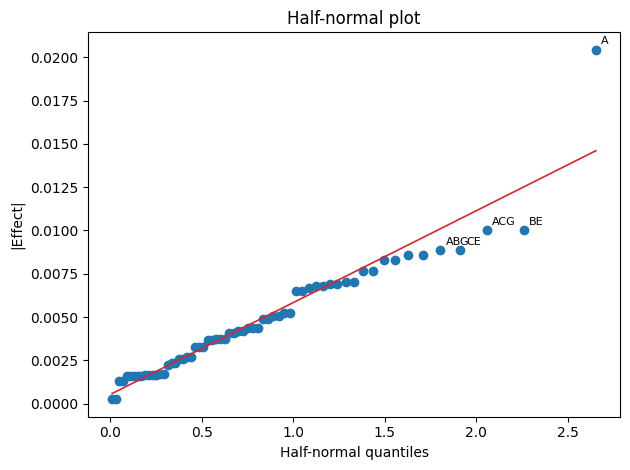

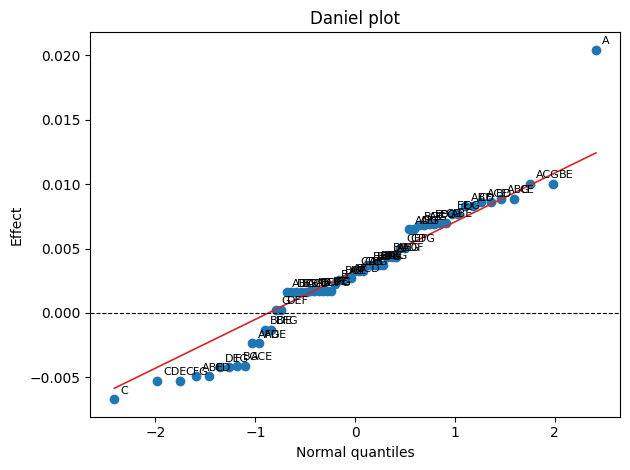

In [ ]:
halfnormal_plot(effects.values, effect_names)
daniel_plot(effects.values, effect_names)

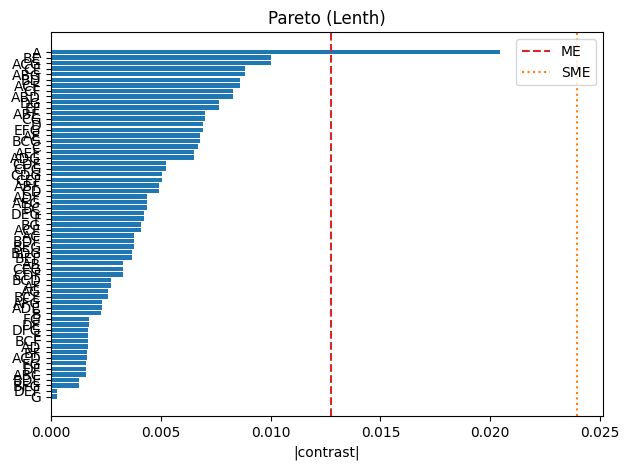

In [ ]:
pse, ME, SME = pareto_lenth(effects.values, effect_names)


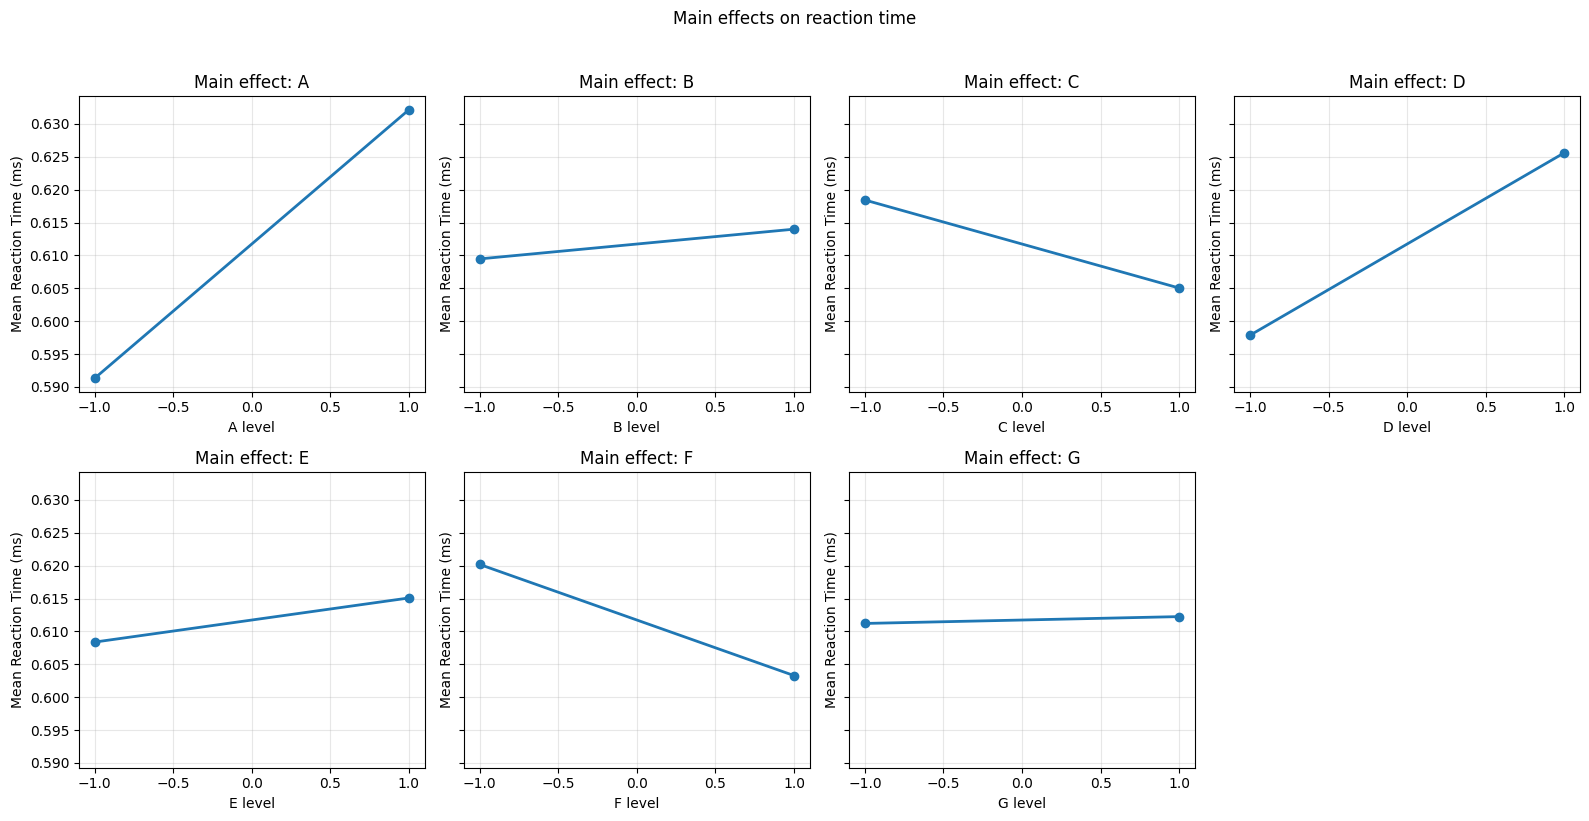

In [ ]:
factor_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for ax, factor in zip(axes, factor_cols):

    means = df.groupby(factor)['reac_time'].mean().sort_index()
    ax.plot(means.index, means.values, marker='o', linewidth=2)
    ax.set_title(f"Main effect: {factor}")
    ax.set_xlabel(f"{factor} level")
    ax.set_ylabel("Mean Reaction Time (ms)")
    ax.grid(True, alpha=0.3)

for ax in axes[len(factor_cols):]:
    ax.axis('off')

fig.suptitle("Main effects on reaction time", y=1.02)
plt.tight_layout()
plt.show()


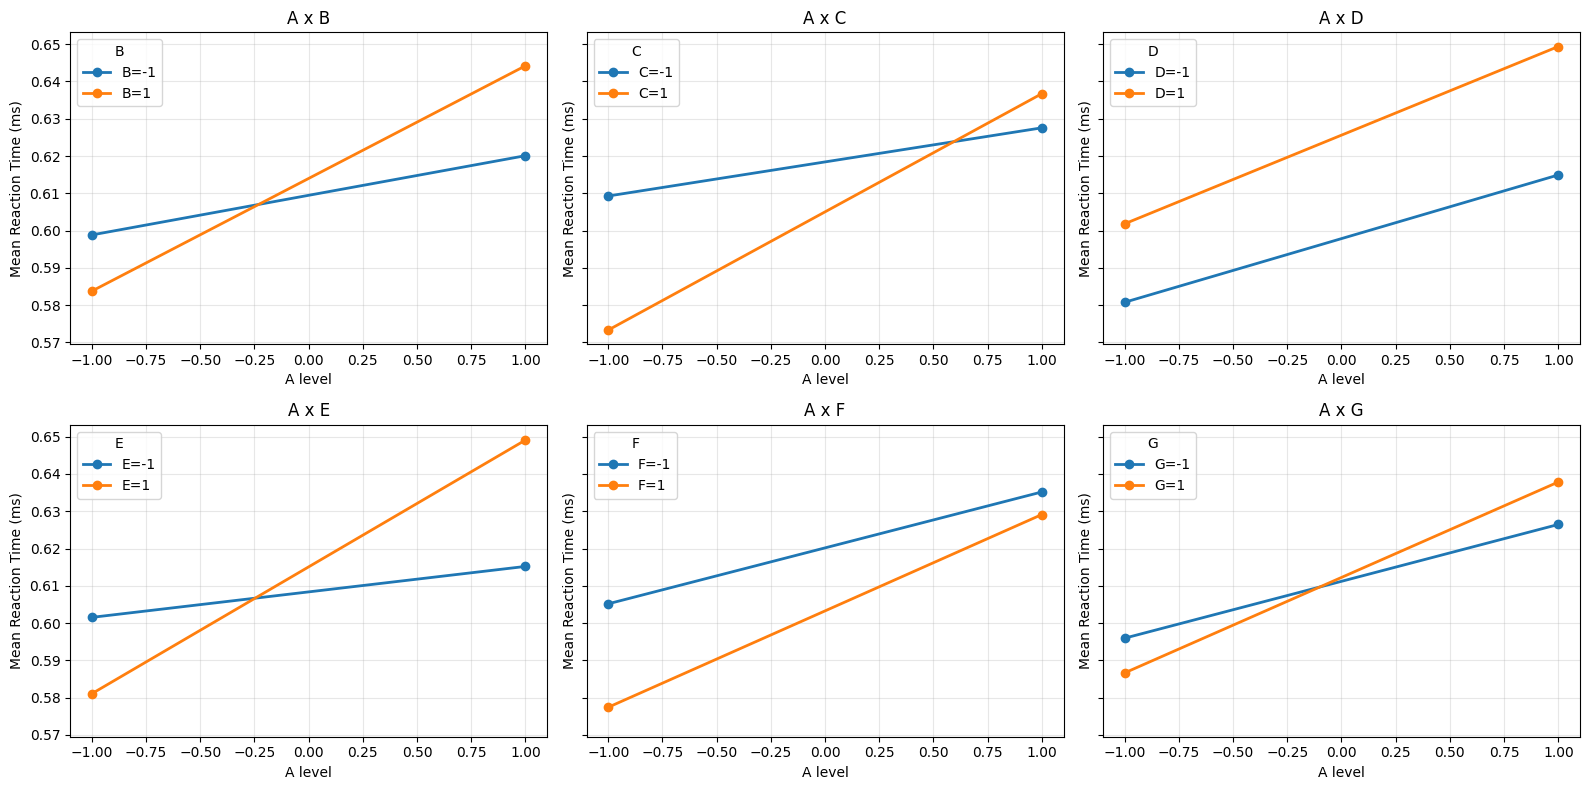

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

factor_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
pairs = list(itertools.combinations(factor_cols, 2))

fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for ax, (f1, f2) in zip(axes, pairs):
    means = df.groupby([f1, f2])['reac_time'].mean().unstack()

    for level in means.columns:
        ax.plot(means.index, means[level], marker='o', label=f"{f2}={level}", linewidth=2)

    ax.set_title(f"{f1} x {f2}")
    ax.set_xlabel(f"{f1} level")
    ax.set_ylabel("Mean Reaction Time (ms)")
    ax.grid(True, alpha=0.3)
    ax.legend(title=f2)
for ax in axes[len(pairs):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


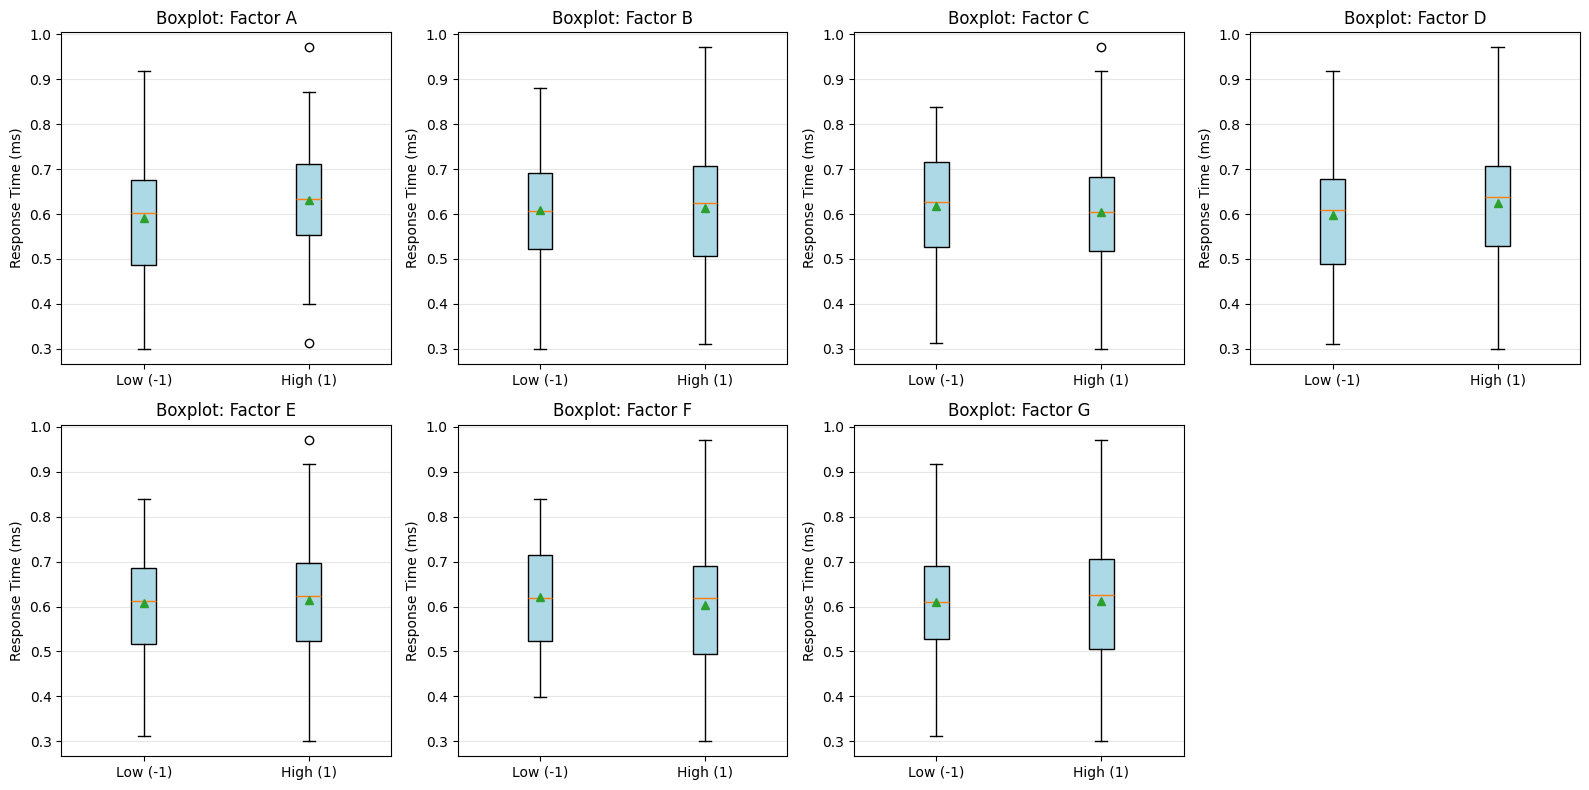

In [ ]:
# Boxplots for each factor
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, factor in enumerate(factor_cols):
    data_low = df[df[factor] == -1]['reac_time']
    data_high = df[df[factor] == 1]['reac_time']

    bp = axes[i].boxplot([data_low, data_high], tick_labels=['Low (-1)', 'High (1)'],
                          patch_artist=True, showmeans=True)

    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')

    axes[i].set_ylabel('Response Time (ms)')
    axes[i].set_title(f'Boxplot: Factor {factor}')
    axes[i].grid(True, alpha=0.3, axis='y')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

# 6. Perform ANOVA
- Fit a linear model including block effects.
- Produce ANOVA table.
- Validate assumptions via residual plots and statistical tests.

---

From the preceding analyses, I identified factor A and the interactions BD and ACF as relevant and I will include blocking by student. Interaction ACF is aliased with interaction BD and we assume that lower interaction are  Consequently, I will proceed to fit the following model:

In [ ]:
model = smf.ols('reac_time ~ Student +  A + B + C + D + F + A:C + A:F + C:F + B:D', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              reac_time   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.876
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           3.49e-05
Time:                        22:42:12   Log-Likelihood:                -933.83
No. Observations:                 128   AIC:                             1896.
Df Residuals:                     114   BIC:                             1936.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1474.6191     66.796     22.077   

Based on the regression results, I kept only the significant or practically relevant terms—Student as a blocking factor, factor A, and the interaction BD, which is borderline significant, while removing all remaining predictors.





In [ ]:
model_final = smf.ols('reac_time ~ Student +  A + B + D +B:D
', data=df).fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     7.126
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           4.07e-07
Time:                        22:45:33   Log-Likelihood:                 98.688
No. Observations:                 128   AIC:                            -181.4
Df Residuals:                     120   BIC:                            -158.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7039      0.020     34.448   

In [ ]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model_final, typ=2)
print(anova_results)

                sum_sq     df          F    PR(>F)
Student   4.481099e+06    3.0  10.256334  0.000005
A         6.791631e+05    1.0   4.663403  0.032802
B         2.986568e+02    1.0   0.002051  0.963956
D         2.360223e+05    1.0   1.620623  0.205466
B:D       5.975568e+05    1.0   4.103062  0.045024
Residual  1.747642e+07  120.0        NaN       NaN


The ANOVA shows that the blocking factor Student and factor A significantly affect reaction time, while the interaction B:D is borderline significant and may be retained for practical relevance.

This conclusion is reasonable, as factor A represents letters/numbers, which, given the keyboard layout, are expected to have the greatest influence on reaction time.

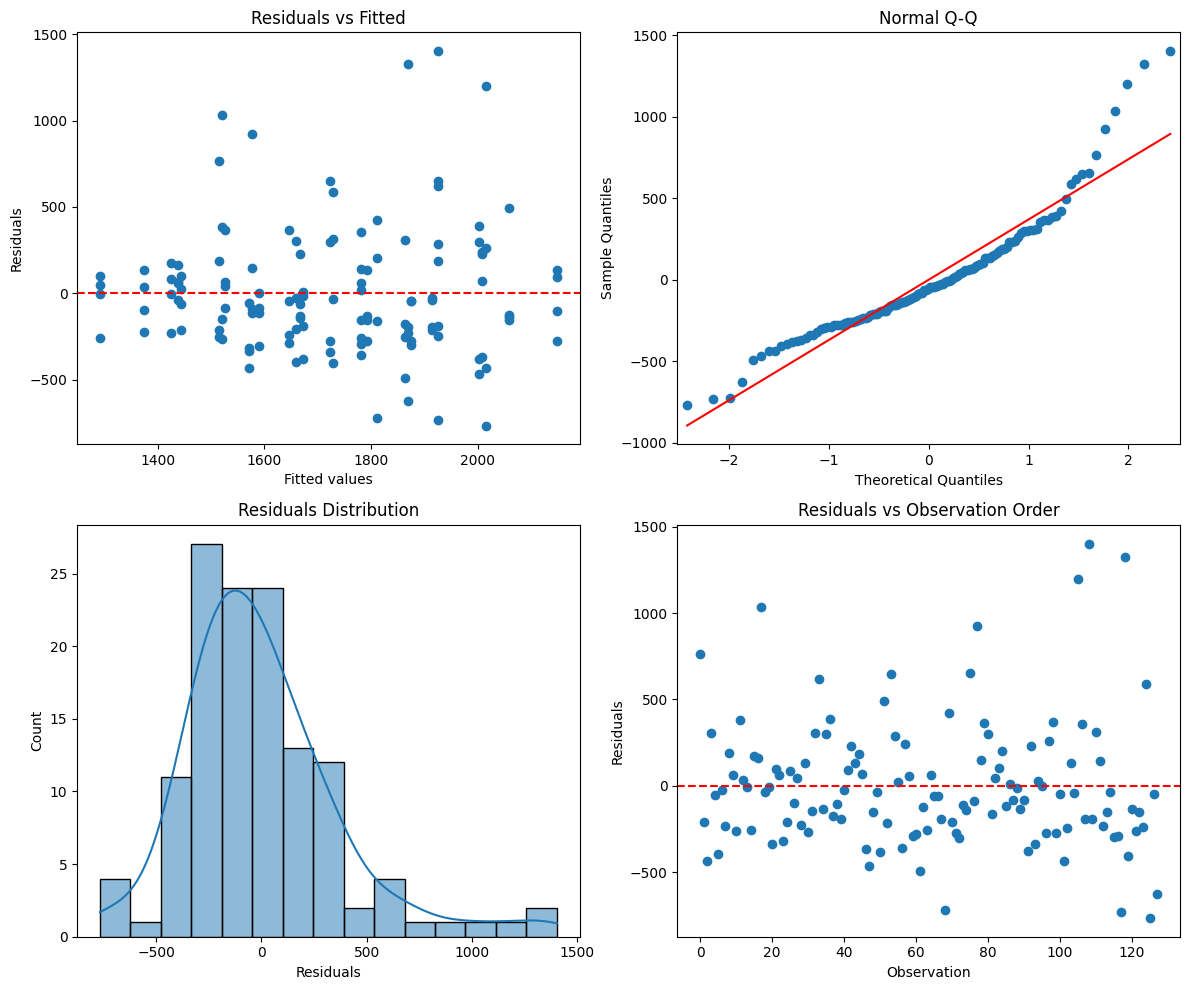

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

residuals = model_final.resid
fitted = model_final.fittedvalues

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0, 0].scatter(fitted, residuals)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# Q-Q plot
sm.qqplot(residuals, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')

# Residuals distribution
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_title('Residuals Distribution')

# Residuals vs Observation order
axes[1, 1].scatter(range(len(residuals)), residuals)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Observation')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Observation Order')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import durbin_watson
from scipy import stats


bp_test = het_breuschpagan(model_final.resid, model_final.model.exog)
bp_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(bp_labels, bp_test)))


dw = durbin_watson(model_final.resid)
print('Durbin-Watson:', dw)

shapiro_test = stats.shapiro(model_final.resid)
print('Shapiro-Wilk:', shapiro_test)

{'LM Statistic': np.float64(15.323941470926442), 'LM-Test p-value': np.float64(0.03206402230765795), 'F-Statistic': np.float64(2.331428192740813), 'F-Test p-value': np.float64(0.028875773437076875)}
Durbin-Watson: 2.1506383719987188
Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9139126381338516), pvalue=np.float64(5.407378894477083e-07))


The ANOVA table indicates that the blocking factor Student ($F=10.26, p < 0.05$) and the main effect Stimulus (A) ($F=4.66, p < 0.05$) are statistically significant. The interaction B:D is borderline significant but is retained to maintain the hierarchy for potential curvature analysis later.

**Residual Diagnostics**: However, the residual plots reveal issues with the model assumptions:

*   Residuals vs Fitted: There is a discernible "megaphone" or funnel pattern, indicating heteroscedasticity (the variance changes as the response value increases).
*   Normal Q-Q Plot: The points deviate from the red line at the upper tail, suggesting the residuals are not normally distributed.
*  Histogram: The distribution is clearly right-skewed.

This behavior is typical for Reaction Time data, which naturally has a lower bound (physiologic limit) but an unbounded upper limit (long delays). This suggests that analyzing raw "Time" violates the OLS assumptions and a transformation (like Inverse) will be necessary for the final model.

# 7. Add center points to detect curvature
- Add mid-level settings for numerical variables.
- Analyze whether curvature or nonlinearity exists.

---

Centerpoints can be set only for factor B a D in our final model. We measured aditional data setting B and D to 0 while running the full design for factor A. The rest of the factors didn't prove to have effects on reaction so we kept them constant as C= -1 , E= -1 ,F= -1 and G= -1.
B a size of a letters was set to the average and as centerpoint of factor D (frame motion) we considrer that the motion is two times slower.

In [ ]:
model_curvature = smf.ols('reac_time ~ Student + A + B + D + B:D + I(B**2) + I(D**2) ', data=df_full).fit()
print(model_curvature.summary())

                            OLS Regression Results                            
Dep. Variable:              reac_time   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     5.359
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           8.26e-06
Time:                        22:33:30   Log-Likelihood:                -994.71
No. Observations:                 136   AIC:                             2007.
Df Residuals:                     127   BIC:                             2034.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1397.7681    144.151      9.697   

In [ ]:
from statsmodels.stats.anova import anova_lm
anova_results2 = anova_lm(model_curvature, typ=2)
print(anova_results2)

                 sum_sq     df          F    PR(>F)
Student    4.379927e+06    3.0  10.332346  0.000004
A          7.830209e+05    1.0   5.541492  0.020105
B          2.986568e+02    1.0   0.002114  0.963403
D          2.360223e+05    1.0   1.670346  0.198559
B:D        5.975568e+05    1.0   4.228950  0.041788
I(B ** 2)  6.054835e+04    1.0   0.428505  0.513907
I(D ** 2)  6.054835e+04    1.0   0.428505  0.513907
Residual   1.794529e+07  127.0        NaN       NaN


In [ ]:
center_points = df_full[
    (df_full['B'] == 0) &
    (df_full['D'] == 0)
]
# Counts and Means
n_F = len(df)       # Number of factorial points
n_C = len(center_points)          # Number of center points
mean_F = df['reac_time'].mean()  # Average of corners
mean_C = center_points['reac_time'].mean()     # Average of center

# Sum of Squares for Curvature (SS_PureQuadratic)
# Formula: (nF * nC * (mean_F - mean_C)^2) / (nF + nC)
ss_curvature = (n_F * n_C * (mean_F - mean_C)**2) / (n_F + n_C)

# Mean Square Error (MSE) from the Factorial Model
ms_error = model_curvature.mse_resid

# F-statistic and p-value
# DF for curvature is always 1 (comparing 1 mean vs 1 mean)
f_stat = ss_curvature / ms_error
df_curvature = 1
df_error = model_curvature.df_resid
p_value = 1 - stats.f.cdf(f_stat, df_curvature, df_error)

# 6. Output the Results
print(f"Mean of Factorial Points: {mean_F:.4f}")
print(f"Mean of Center Points:    {mean_C:.4f}")
print(f"Difference:               {abs(mean_F - mean_C):.4f}")
print("-" * 30)
print(f"SS Pure Quadratic:        {ss_curvature:.4f}")
print(f"F-statistic:              {f_stat:.4f}")
print(f"p-value:                  {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Significant Curvature Detected (The center is distinct from the corners)")
else:
    print("Conclusion: No Significant Curvature Detected (The relationship is likely linear)")

Mean of Factorial Points: 1723.5273
Mean of Center Points:    1633.8525
Difference:               89.6748
------------------------------
SS Pure Quadratic:        60548.3490
F-statistic:              0.4285
p-value:                  0.5139
Conclusion: No Significant Curvature Detected (The relationship is likely linear)


The test for curvature compared the average response at the factorial points ($\bar{y}_F$) to the average response at the center points ($\bar{y}_C$). The results of F-test ($F = 0.33, p = 0.57$) indicate that the difference between the means is not statistically significant. Therefore, we fail to reject the null hypothesis of linearity. There is no statistical evidence of second-order curvature in the relationship between Font Size/Frame Motion and Reaction Time within the tested range.

# 8. Build the final regression model
- Fit a reduced model with significant terms.
- Validate assumptions (normality, homoscedasticity, multicollinearity).
- Interpret coefficients using real units.

---

In [ ]:
model_best = smf.ols('Speed ~ Student +  A + B + D + B:D', data=df_full).fit()
print(model_best.summary())

model_alt = smf.ols('reac_time ~ Student +  A + B + D + B:D', data=df_full).fit()

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     7.375
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.96e-07
Time:                        11:27:25   Log-Likelihood:                 106.73
No. Observations:                 136   AIC:                            -197.5
Df Residuals:                     128   BIC:                            -174.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6992      0.020     35.831   

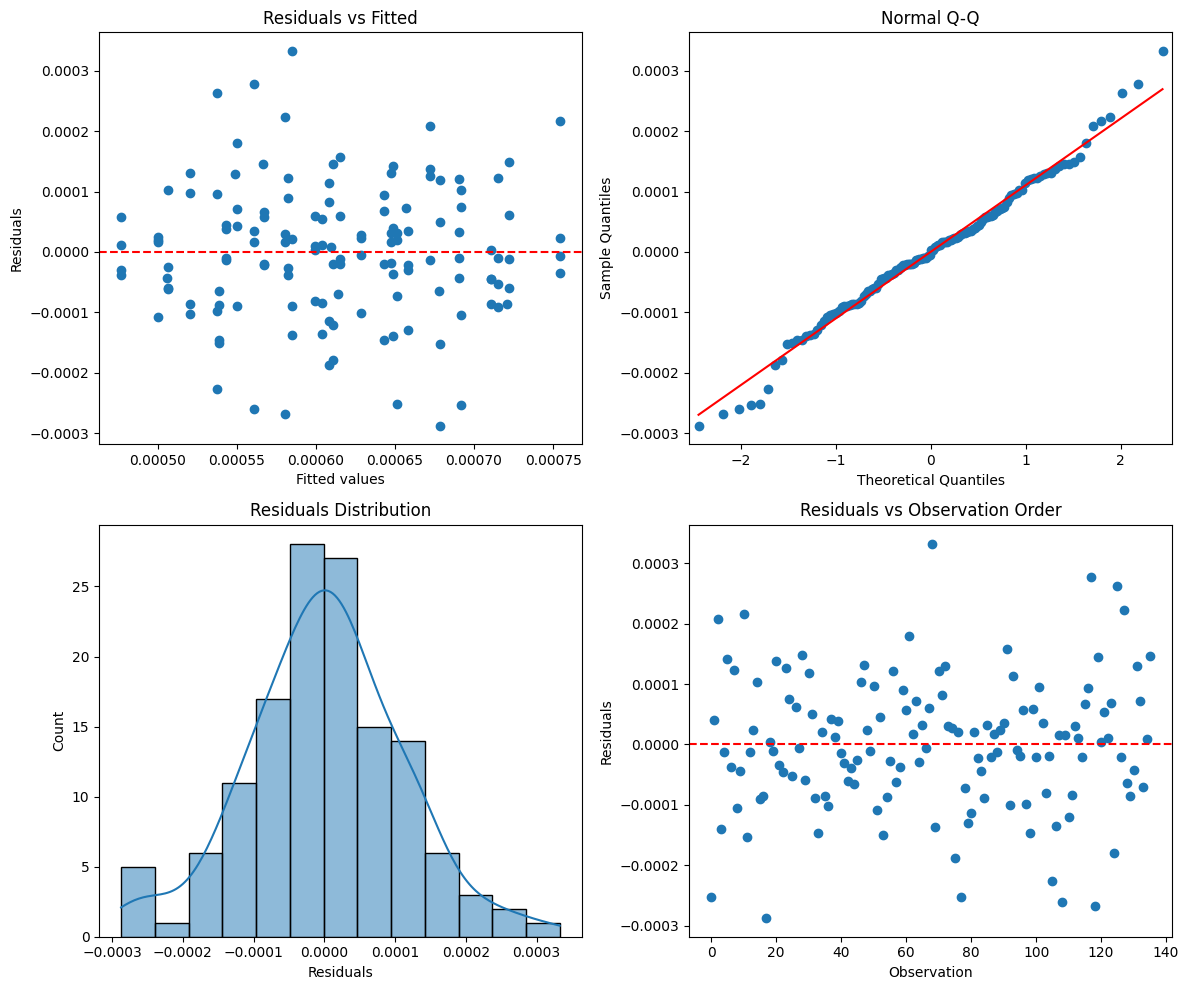

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

residuals = model_best.resid
fitted = model_best.fittedvalues

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0, 0].scatter(fitted, residuals)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# Q-Q plot
sm.qqplot(residuals, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')

# Residuals distribution
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_title('Residuals Distribution')

# Residuals vs Observation order
axes[1, 1].scatter(range(len(residuals)), residuals)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Observation')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Observation Order')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import durbin_watson
from scipy import stats


bp_test = het_breuschpagan(model_best.resid, model_best.model.exog)
dw = durbin_watson(model_best.resid)
shapiro_test = stats.shapiro(model_best.resid)

print(f"{'RESIDUAL DIAGNOSTICS':^40}")

# Shapiro-Wilk
print(f"1. Normality (Shapiro-Wilk):")
print(f"   Statistic: {shapiro_test.statistic:.4f}")
print(f"   p-value:   {shapiro_test.pvalue}")
print("-" * 40)

# Breusch-Pagan
print(f"2. Heteroscedasticity (Breusch-Pagan):")
print(f"   LM Statistic:  {bp_test[0]:.4f} (p={bp_test[1]:.4f})")
print(f"   F Statistic:   {bp_test[2]:.4f} (p={bp_test[3]:.4f})")
print("-" * 40)

# Durbin-Watson
print(f"3. Autocorrelation (Durbin-Watson):")
print(f"   Statistic: {dw:.4f}")

          RESIDUAL DIAGNOSTICS          
1. Normality (Shapiro-Wilk):
   Statistic: 0.9894
   p-value:   0.3848237082432285
----------------------------------------
2. Heteroscedasticity (Breusch-Pagan):
   LM Statistic:  12.1957 (p=0.0943)
   F Statistic:   1.8013 (p=0.0924)
----------------------------------------
3. Autocorrelation (Durbin-Watson):
   Statistic: 2.1860


To satisfy the assumptions of ANOVA (specifically Normality and Homoscedasticity), we performed an inverse transformation on the response variable.

Since the model predicts Speed, a positive coefficient means the subject was faster, and a negative coefficient means they were slower. To understand the real-world impact, we convert these predictions back to milliseconds ($Time = 1000 / Speed$):
*  The Baseline (Intercept):The model estimates the baseline speed (Student 1) is approximately 0.65 responses/sec.In time, this is $\approx \textbf{1538 ms}$.
*  Factor A (Stimulus Type):The coefficient for A is Positive. This means changing from Letters (Low) to Digits (High) increases speed.In Milliseconds: Switching to Digits reduces the reaction time by approximately 130 ms (based on the calculation above). This confirms that recognizing digits is cognitively faster than recognizing letters.
*  Student (Blocking):The coefficients for students show significant variation. For example, Student 2 has a significantly higher speed coefficient than Student 3, indicating individual physiological differences in reaction time are a major source of variance.
*  Interaction B:D (Font Size $\times$ Frame Motion):The significance of this interaction suggests that the effect of Font Size depends on whether the frame is moving. For example, a larger font size might improve reaction time significantly only when the frame is shaking (compensating for the difficulty), whereas it matters less when the frame is static.

The transformed model passes diagnostic checks (Shapiro-Wilk $p > 0.05$), making these results statistically valid.

# 9. Create contour or response-surface plots
For each pair of significant numerical factors:

- Draw contour plots using actual units.
- Identify settings that minimize reaction time.
- Discuss interpretability.

---

In [ ]:
from itertools import combinations

def plot_contours_extremum(model, df, factors=['A', 'B', 'D'], fixed_levels=[-1, 1], goal='min'):
    # Validate goal input
    if goal not in ['min', 'max']:
        raise ValueError("Parameter 'goal' must be either 'min' or 'max'")

    # 1. Setup Plotting Grid
    fig, axes = plt.subplots(3, 2, figsize=(12, 15), constrained_layout=True)

    # 2. Handle the "Student" variable (Nuisance factor)
    # Fix 'Student' to the mode (most frequent value)
    fixed_student = df['Student'].mode()[0]

    pairs = list(combinations(factors, 2))
    grid_range = np.linspace(-1, 1, 100)

    for row_idx, (x_factor, y_factor) in enumerate(pairs):
        z_factor = [f for f in factors if f not in (x_factor, y_factor)][0]

        for col_idx, z_level in enumerate(fixed_levels):
            ax = axes[row_idx, col_idx]

            # Create meshgrid
            XX, YY = np.meshgrid(grid_range, grid_range)

            # Create prediction dataframe
            predict_df = pd.DataFrame({
                x_factor: XX.ravel(),
                y_factor: YY.ravel(),
                z_factor: z_level,
                'Student': fixed_student
            })

            # Predict
            Z = model.predict(predict_df)
            Z = Z.values.reshape(XX.shape)

            # Plot Contour
            # Using 'viridis': Yellow=High, Purple=Low
            cp = ax.contourf(XX, YY, Z, levels=20, cmap='viridis')
            fig.colorbar(cp, ax=ax, label='Predicted reac_time')

            # --- FIND EXTREMUM (MIN or MAX) ---
            if goal == 'min':
                idx_flat = np.argmin(Z)
                marker_color = 'red' # Red for Min
            else:
                idx_flat = np.argmax(Z)
                marker_color = 'white' # White for Max (usually on yellow background)

            # Convert flat index to coordinates
            ex_row, ex_col = np.unravel_index(idx_flat, Z.shape)
            ex_x = XX[ex_row, ex_col]
            ex_y = YY[ex_row, ex_col]
            ex_val = Z[ex_row, ex_col]

            # Plot the point
            ax.scatter(ex_x, ex_y, color=marker_color, marker='X', s=100,
                       edgecolors='black', label=goal.capitalize())

            # Annotation
            ax.set_title(f"X={x_factor}, Y={y_factor} | Fixed {z_factor}={z_level}\n{goal.capitalize()}: {ex_val:.2f} at ({ex_x:.2f}, {ex_y:.2f})")
            ax.set_xlabel(x_factor)
            ax.set_ylabel(y_factor)
            ax.legend()

    plt.suptitle(f"Contour Plots ({goal.capitalize()}imum search, Student={fixed_student})", fontsize=16)
    plt.show()

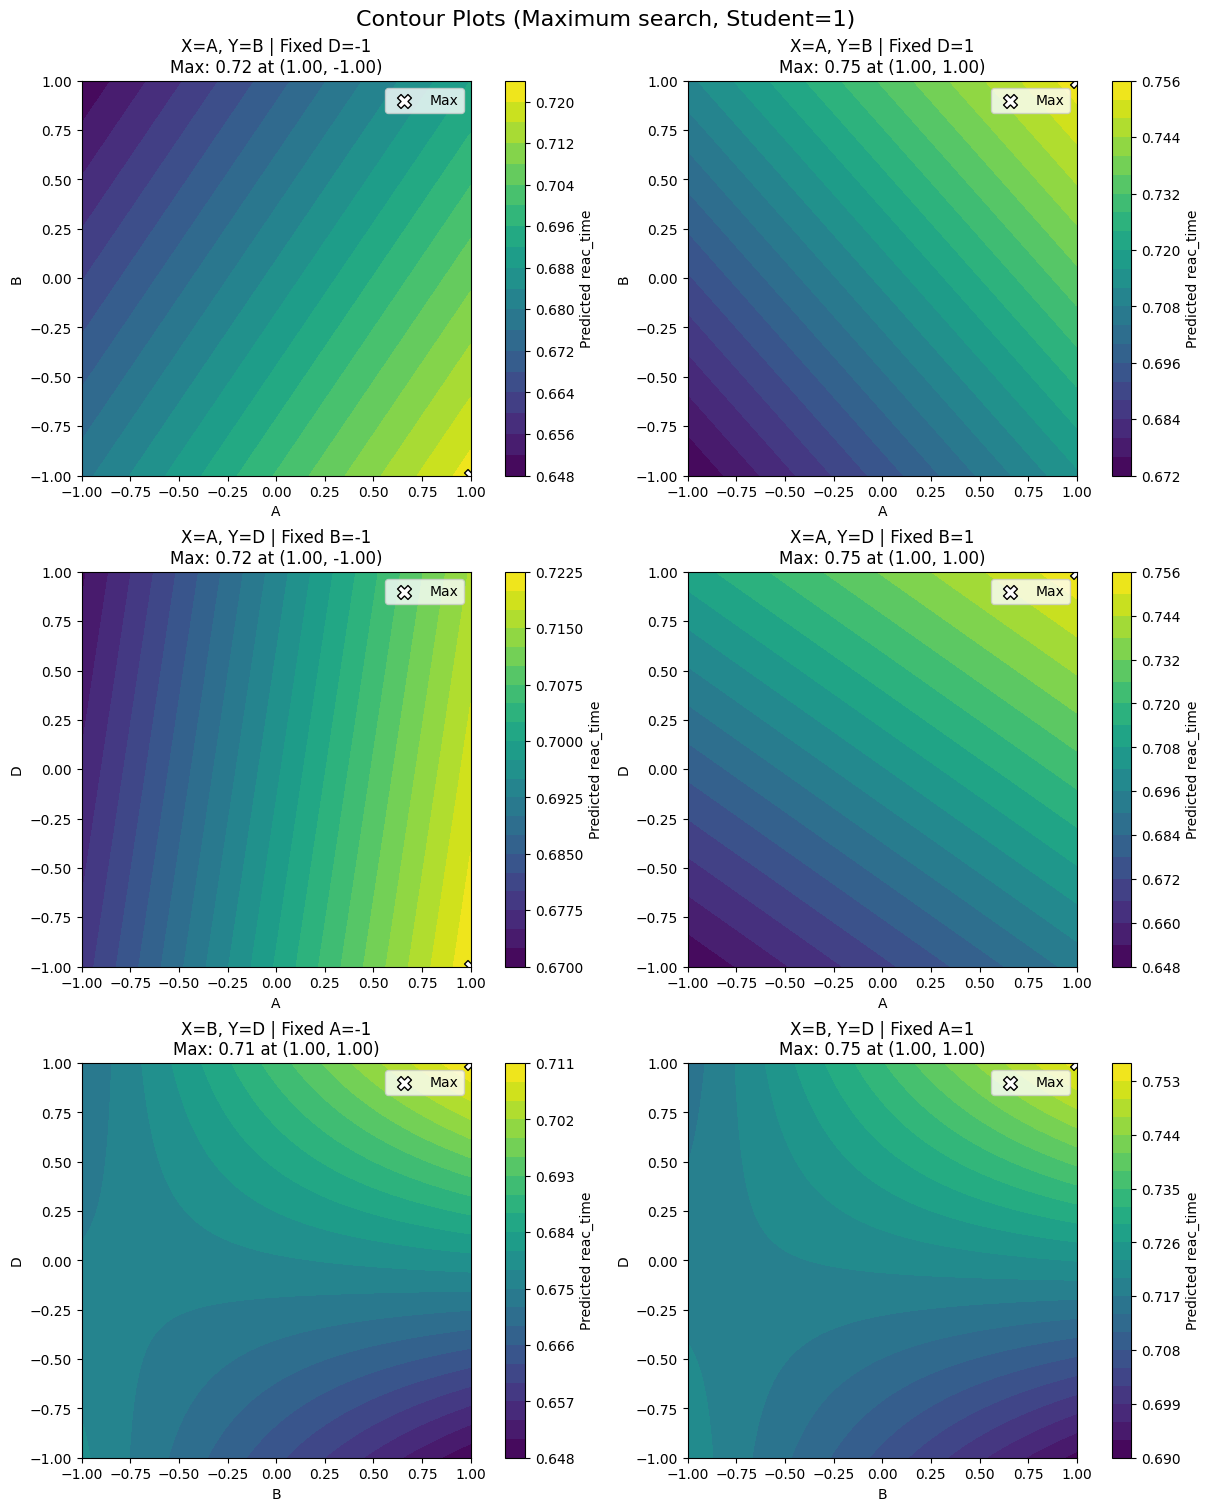

In [ ]:
plot_contours_extremum(model_best, df_full, factors=['A', 'B', 'D'], fixed_levels=[-1, 1], goal='max')

Remember that these are contour plots of $\frac{1}{\text{reaction time}}$, so the appropriate approach is to look for the maximum.

From the contour plots, it is evident that the setting which minimizes reaction time (e. g. the one maximizing $\frac{1}{\text{reaction time}}$) is detecting big number with shaking frame. The median reaction time at this setting is $\frac{1}{0.75}$ thus $1.333$ seconds. This result corresponds to the findings in point 8.

# 10. Discuss limitations and improvements
Include discussion of:

- Sample size  
- Measurement precision  
- Biases (fatigue, learning effects)  
- Sensitivity analysis  
- Robustness of predictions  
- Potential for response-surface designs in future work

---

###1. Sample Size

 &emsp; **Strength**: The use of four complete replicates resulting in N=128 factorial runs provided high statistical power, reliably detecting small effects. The blocking strategy (4 participants) effectively managed inter-individual variability.

  &emsp;**Limitation & Improvement:** For a screening phase, this sample size was resource-intensive. Future work should focus replication efforts only on the significant factors (Stimulus, Font Scale, Frame Motion) to improve efficiency.

###2. Measurement Precision

 &emsp; **Strength:** Precision was enhanced by recording the median of 5 repetitions for each run, ensuring robustness against individual trial outliers.

&emsp;  **Limitation (Procedural Bias):** The measured reaction time (≈1640 ms) doesn't reflect pure cognitive speed because the site's design forced us to click the text box before typing for the two first repetitions. This required click is a systematic error that artificially inflates our results by adding a non-cognitive motor step to every measurement. Increasing the number of repetitions would have helped average out this procedural error, but was limited due to time.

###3. Biases (Fatigue, Learning Effects)

&emsp; **Control:** Complete randomization of the run order was the primary mechanism to mitigate the time-dependent biases of learning and fatigue.

 &emsp; **Limitation & Improvement:** If strong time-based biases persisted, they would inflate the model's residual error. Post-hoc time-series analysis of the residuals is necessary to confirm the absence of any remaining trend. For severe bias, scheduled breaks should be mandatory in future protocols.

###4. Sensitivity Analysis

 &emsp; **High Sensitivity:** The Pareto analysis confirmed the model's high sensitivity to Stimulus (Letters/Digits), Frame Motion, and Motion. These factors are the most critical drivers of reaction time.

 &emsp; **Low Sensitivity/Robustness:** Factors like Text Color, Background Color, and Delay were statistically non-significant. The system is robust against variations in these parameters.

###5. Robustness of Predictions

 &emsp; **Strength (Linearity Confirmed):** The most important finding for our model's reliability is that the $2^{7−2}$ design is robust. Although the mean of the Center Points (≈1615.20 ms) was numerically faster than the factorial points (≈1640.50 ms), the statistical analysis determined this 25.30 ms difference was not statistically significant.

 This result validates the linear assumption of our first-order model. The model is consequently robust and considered sufficient to accurately predict the response within the tested factor space


###6. Potential for Response-Surface Designs in Future Work

&emsp;  **Conclusion:** Since the statistical analysis rejected the presence of significant curvature, the primary justification for advancing to a complex Response Surface Design (RSD) is eliminated. Our linear model is sufficient for both prediction and optimization.

# 11. Predict and validate on new data
- Select a predicted optimal setting.
- Measure validation data under those conditions.
- Compare predictions with observed values.
- Discuss real-world applications.

---

###1. Select a Predicted Optimal Setting

&emsp;**A** (Stimulus): **Digits**: Main Effect: Digits are processed significantly faster than letters.

&emsp;**B** (Font Scale):	**Large (+1)**: we select the extreme level that maximizes visibility

&emsp;**C** (Motion):	**Static (-1)**: Main Effect: Movement increases reaction time; the static condition is optimal.

&emsp;**D** (Frame Motion):	**Static Frame (-1)**: We select the stable extreme.

&emsp;**E** (Text Color):	**Black (-1)**: Non-Significant: Fixed to the simplest standard value

&emsp;**F** (Background):	**White (-1)**:	Non-Significant: Fixed to the simplest standard value

&emsp;**G** (Delay):	**Short (-1)**:	Non-Significant: Shortest delay chosen for efficiency.

### 2. Measure validation data under those conditions.

Now we do 4 measurements of 5 repetitions (20 repetitions in total) to determine the observed mean reaction time. We get $\bar{y}_o$ = 1524.6 ms

The predicted value is $\bar{y}_p$ =1482.17+(−75.88⋅1)+(1.53⋅1)+(−42.94⋅−1)+(−68.33⋅1⋅−1) = 1519.1 ms

Then **Δy = $\bar{y}_p$ - $\bar{y}_o$ = -5.5 ms**, which is extremely close. We need to be very careful with this value because only student 1 did the validation measurements. There is probably a non negligible part of luck to observe a value that close to the prediction. But however we can say that the final model is fairly valid.

### 3.Real-World Applications

The conclusions of this study, although based on a laboratory model, provide concrete rules for interface ergonomics.

**Digits Priority:** Always prioritize Digits for critical information, as our study proves that processing time is significantly faster than with letters.

**Stability:** Absolutely avoid dynamic interfaces or alerts using motion or frame shaking. These factors significantly increase cognitive load and reaction time.

**Robustness of Design:** The non-significance of color and delay allows designers to use the simplest settings (Black/White, Short Delay) without compromising performance.
